Longest string: 897


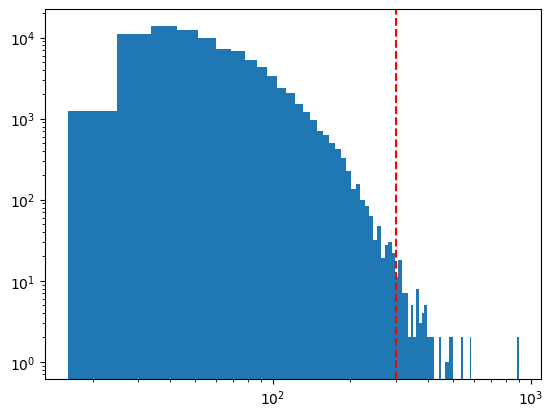

In [58]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

def load_all_texts(path = 'HumanML3D/HumanML3D/texts'):

    files = glob(f'{path}/*.txt')
    longest_string = 0
    lengths = []
    data = {}
    for file in files:
        name = file.split('/')[-1].split('.')[0]
        with open(file, 'r') as f:
            texts = f.read().split('\n')
            # remove '' from list
            texts = list(filter(None, texts))

            # cut at first #
            texts = [text.split('#')[0] for text in texts]

            # longest string
            longest_string = max(longest_string, max([len(text) for text in texts]))


            # lengths
            for text in texts:
                lengths.append(len(text))

            data[name] = texts  

    print(f'Longest string: {longest_string}')

    plt.hist(lengths, bins=100)
    plt.xscale('log')
    plt.yscale('log')
    plt.axvline(300, color='r', linestyle='--')

    return data

data = load_all_texts()

In [49]:

all_words = []
for key in data:
    # print(key)
    for text in data[key]:
        all_words += text.split(' ')


unique_words = set(all_words)
vocab_size = len(unique_words)  
print('Number of unique words:', vocab_size)

# make encoding
word2idx = {word: idx for idx, word in enumerate(unique_words)}
idx2word = {idx: word for word, idx in word2idx.items()}



Number of unique words: 10054


In [54]:
import numpy as np
from tqdm import tqdm
# save encodings
path = 'HumanML3D/HumanML3D/texts_enc/simple/'
max_length = 250
with open(f'{path}max_length.txt', 'w') as f:
    f.write(str(max_length))
with open(f'{path}vocab_size.txt', 'w') as f:
    f.write(str(vocab_size))
np.savez(f'{path}word2idx.npz', word2idx)
np.savez(f'{path}idx2word.npz', idx2word)
for key in tqdm(data):

    full_path = f'{path}encodings/{key}.npy'
    # print(full_path)
    enc = []
    for text in data[key][:3]:
        enc.append([word2idx[word] for word in text.split(' ')])
    if len(enc) != 3:
        if len(enc) == 2:
            enc.append(enc[0])
        if len(enc) == 1:
            enc.append(enc[0])
            enc.append(enc[0])

    if len(enc) != 3:
        print('ERROR')
        break
    
    # pad up to 300
    enc = [np.pad(e, (0, max_length-len(e)), 'constant') for e in enc]
    enc = np.array(enc)
    np.save(full_path, enc)

100%|██████████| 29232/29232 [00:03<00:00, 9257.47it/s]
